# Pre-Processing the Data

Now that I have the videos created, I will go through each video, generate the frames, and then go through each frame and generate the landmark points

In [3]:
import os
import cv2

In [4]:
vid_base_dir = 'video_data'
videos_per_word = 100

## Splitting Videos Into Frames

First, I will open each video, and then capture each frame one by one. Then, I will save each frame as a png image to a frames directory in the same directory as the video

In [15]:
for word_id in range(0, 2):
    for video_id in range(1):
        # Create frames directory next to each video
        video_dir = os.path.join(vid_base_dir, f'{word_id}', f'{video_id}')
        video_file_path = os.path.join(video_dir, f'{word_id}_{video_id}.mp4')
        frames_dir = os.path.join(video_dir,'frames')
#            print(frames_dir)
#            print(video_file_path)
#            print(video_dir)
        if os.path.exists(frames_dir) is False:
            print(f'Creating new frames directory {frames_dir}')
            os.makedirs(frames_dir)
        else:
            print(f'{frames_dir} already exists')
        
        # Open video capture of current video
        cap = cv2.VideoCapture(video_file_path)

        frame_num = 0
        while True:
            # Read next frame
            ret, frame = cap.read()

            # Break when video is over
            if not ret:
                break

            # Save frames to frame_file_path
            frame_file_path = os.path.join(frames_dir, f'{word_id}_{video_id}_{frame_num}.png')
            print(f'saving frame {word_id}_{video_id}_{frame_num}.png to {frame_file_path}')
            cv2.imwrite(frame_file_path, frame)
            frame_num += 1
            
        cap.release()

video_data/0/0/frames already exists
saving frame 0_0_0.png to video_data/0/0/frames/0_0_0.png
saving frame 0_0_1.png to video_data/0/0/frames/0_0_1.png
saving frame 0_0_2.png to video_data/0/0/frames/0_0_2.png
saving frame 0_0_3.png to video_data/0/0/frames/0_0_3.png
saving frame 0_0_4.png to video_data/0/0/frames/0_0_4.png
saving frame 0_0_5.png to video_data/0/0/frames/0_0_5.png
saving frame 0_0_6.png to video_data/0/0/frames/0_0_6.png
saving frame 0_0_7.png to video_data/0/0/frames/0_0_7.png
saving frame 0_0_8.png to video_data/0/0/frames/0_0_8.png
saving frame 0_0_9.png to video_data/0/0/frames/0_0_9.png
saving frame 0_0_10.png to video_data/0/0/frames/0_0_10.png
saving frame 0_0_11.png to video_data/0/0/frames/0_0_11.png
saving frame 0_0_12.png to video_data/0/0/frames/0_0_12.png
saving frame 0_0_13.png to video_data/0/0/frames/0_0_13.png
saving frame 0_0_14.png to video_data/0/0/frames/0_0_14.png
saving frame 0_0_15.png to video_data/0/0/frames/0_0_15.png
saving frame 0_0_16.png

Now that I verified that this works, I will put it in a function to generate the frames for all videos for one or more words

In [17]:
def word_videos_to_frames(start_word=0, end_word=1):
    for word_id in range(start_word, end_word):
        for video_id in range(videos_per_word):
            # Create frames directory next to each video
            video_dir = os.path.join(vid_base_dir, f'{word_id}', f'{video_id}')
            video_file_path = os.path.join(video_dir, f'{word_id}_{video_id}.mp4')
            frames_dir = os.path.join(video_dir,'frames')
#            print(frames_dir)
#            print(video_file_path)
#            print(video_dir)
            if os.path.exists(frames_dir) is False:
                print(f'Creating new frames directory {frames_dir}')
                os.makedirs(frames_dir)
            else:
                print(f'{frames_dir} already exists')
            
            # Open video capture of current video
            cap = cv2.VideoCapture(video_file_path)

            frame_num = 0
            while True:
                # Read next frame
                ret, frame = cap.read()

                # Break when video is over
                if not ret:
                    break

                # Save frames to frame_file_path
                frame_file_path = os.path.join(frames_dir, f'{word_id}_{video_id}_{frame_num}.png')
                print(f'saving frame {word_id}_{video_id}_{frame_num}.png to {frame_file_path}')
                cv2.imwrite(frame_file_path, frame)
                frame_num += 1
                
            cap.release()

I will test the first two words first

In [18]:
word_videos_to_frames(start_word=0, end_word=2)

video_data/0/0/frames already exists
saving frame 0_0_0.png to video_data/0/0/frames/0_0_0.png
saving frame 0_0_1.png to video_data/0/0/frames/0_0_1.png
saving frame 0_0_2.png to video_data/0/0/frames/0_0_2.png
saving frame 0_0_3.png to video_data/0/0/frames/0_0_3.png
saving frame 0_0_4.png to video_data/0/0/frames/0_0_4.png
saving frame 0_0_5.png to video_data/0/0/frames/0_0_5.png
saving frame 0_0_6.png to video_data/0/0/frames/0_0_6.png
saving frame 0_0_7.png to video_data/0/0/frames/0_0_7.png
saving frame 0_0_8.png to video_data/0/0/frames/0_0_8.png
saving frame 0_0_9.png to video_data/0/0/frames/0_0_9.png
saving frame 0_0_10.png to video_data/0/0/frames/0_0_10.png
saving frame 0_0_11.png to video_data/0/0/frames/0_0_11.png
saving frame 0_0_12.png to video_data/0/0/frames/0_0_12.png
saving frame 0_0_13.png to video_data/0/0/frames/0_0_13.png
saving frame 0_0_14.png to video_data/0/0/frames/0_0_14.png
saving frame 0_0_15.png to video_data/0/0/frames/0_0_15.png
saving frame 0_0_16.png

This works, so now I will create some more videos and then run this function again to split those videos into frames

## Extracting Landmark Points Using Mediapipe

To extract landmark points, I am using the mediapipe library.

In [1]:
import mediapipe as mp

2024-12-01 14:28:59.259421: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-01 14:28:59.268457: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-01 14:28:59.345480: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-01 14:28:59.416286: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733081339.484973    3942 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733081339.50

Mediapipe has a holistic model that returns a numpy array with landmark points for the hands, face, and body pose. This is what I will be using to process the frames from images into numpy arrays of landmark points

The landmark points are returned in a multi-dimensional array. There will be too many dimensions if I have to do this for each frame for each video for each word. So, I will flatten each array into one dimension and then concatenate them all into one array.

I will save the array to a .npy file in a landmarks directory in the same directory as that video. These saved arrays will be loaded before training the model

I will first test this with a sample frame

In [16]:
img_test_mp = cv2.imread('video_data/0/57/frames/0_57_60.png')

In [6]:
import matplotlib.pyplot as plt

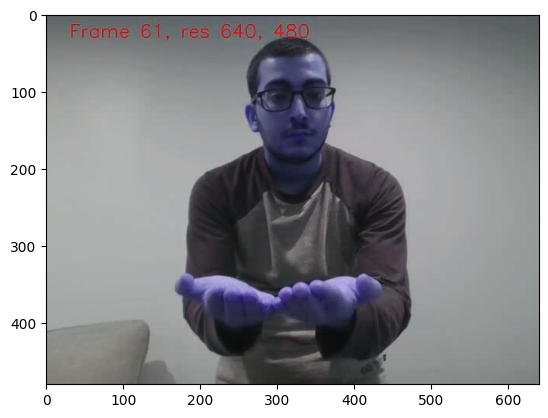

In [17]:
plt.imshow(img_test_mp)
plt.show()

Next, I will create the holistic model and get the landmark points

In [ ]:
mp_holistic = mp.solutions.holistic #Used to get the Holistic class inside

# Create the holistic model
holistic_model = mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

I0000 00:00:1733082062.456229    3942 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1733082062.460028    6758 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: GFX1103_R1 (gfx1103_r1, LLVM 15.0.7, DRM 3.57, 6.8.0-49-generic)


W0000 00:00:1733082062.632835    6742 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733082062.719910    6740 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733082062.723565    6742 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733082062.729372    6751 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733082062.729930    6748 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733082062.738840    6745 inference_feedback_manager.cc:114] Feedback manager 

In [18]:
img_test_mp_rgb = cv2.cvtColor(img_test_mp, cv2.COLOR_BGR2RGB)
img_test_mp_rgb.flags.writeable = False
landmarks = holistic_model.process(img_test_mp_rgb)
img_test_mp_rgb.flags.writeable = True
img_test_mp = cv2.cvtColor(img_test_mp_rgb, cv2.COLOR_RGB2BGR)

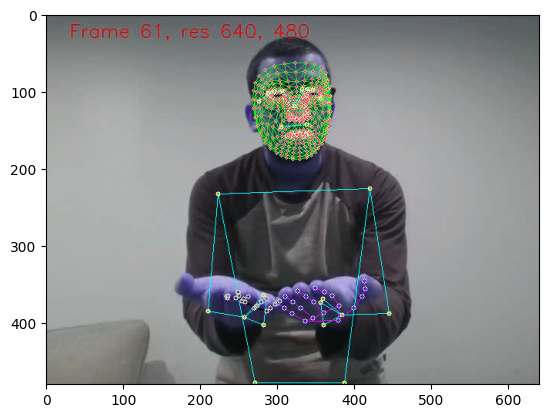

In [21]:
mp_holistic = mp.solutions.holistic #Used to get the Holistic class inside
mp_draw = mp.solutions.drawing_utils #For drawing the results to verify the model is working
#Draw Face
mp_draw.draw_landmarks(img_test_mp, landmarks.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                        mp_draw.DrawingSpec(color=(255,0,0), thickness=1, circle_radius=1),
                        mp_draw.DrawingSpec(color=(0,255,0), thickness=1, circle_radius=1))

#Draw pose
mp_draw.draw_landmarks(img_test_mp, landmarks.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                        mp_draw.DrawingSpec(color=(255,255,0), thickness=1, circle_radius=2),
                        mp_draw.DrawingSpec(color=(0,255,255), thickness=1, circle_radius=2))

#Draw left hand
mp_draw.draw_landmarks(img_test_mp, landmarks.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                        mp_draw.DrawingSpec(color=(0,0,255), thickness=1, circle_radius=2),
                        mp_draw.DrawingSpec(color=(255,0,255), thickness=1, circle_radius=2))

#Draw right hand
mp_draw.draw_landmarks(img_test_mp, landmarks.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                        mp_draw.DrawingSpec(color=(127,127,127), thickness=1, circle_radius=2),
                        mp_draw.DrawingSpec(color=(0,0,0), thickness=1, circle_radius=2))

plt.imshow(img_test_mp)
plt.show()

Since I can get the results and display them to verify, I will make this into a function that I can call using multiple frames to get the landmarks for all frames

In [25]:
def open_image_detect_holistic(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_rgb.flags.writeable = False
    landmarks = holistic_model.process(img_rgb)
    img_rgb.flags.writeable = True
    return img, landmarks

In [26]:
def draw_over_image(image, landmarks):
    mp_holistic = mp.solutions.holistic #Used to get the Holistic class inside
    mp_draw = mp.solutions.drawing_utils #For drawing the results to verify the model is working
    #Draw Face
    mp_draw.draw_landmarks(image, landmarks.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                           mp_draw.DrawingSpec(color=(255,0,0), thickness=1, circle_radius=1),
                           mp_draw.DrawingSpec(color=(0,255,0), thickness=1, circle_radius=1))
    
    #Draw pose
    mp_draw.draw_landmarks(image, landmarks.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                           mp_draw.DrawingSpec(color=(255,255,0), thickness=1, circle_radius=2),
                           mp_draw.DrawingSpec(color=(0,255,255), thickness=1, circle_radius=2))
    
    #Draw left hand
    mp_draw.draw_landmarks(image, landmarks.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                           mp_draw.DrawingSpec(color=(0,0,255), thickness=1, circle_radius=2),
                           mp_draw.DrawingSpec(color=(255,0,255), thickness=1, circle_radius=2))
    
    #Draw right hand
    mp_draw.draw_landmarks(image, landmarks.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                           mp_draw.DrawingSpec(color=(127,127,127), thickness=1, circle_radius=2),
                           mp_draw.DrawingSpec(color=(0,0,0), thickness=1, circle_radius=2))
    
    plt.imshow(image)
    plt.show()

Now I can test both of these functions with an example frame

In [27]:
img, landmark_res = open_image_detect_holistic(image_path='video_data/1/0/frames/1_0_50.png')

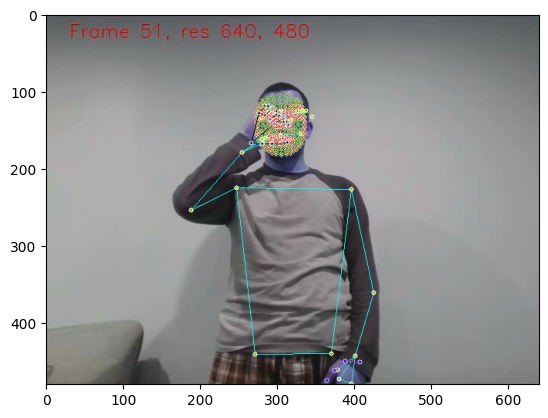

In [28]:
draw_over_image(img, landmarks=landmark_res)

The next step is getting the points in each landmark category.

The pose has 4 properties per landmark: x, y, z, visibility.

In [29]:
import numpy as np

In [ ]:
frame_pose_landmarks = []
for lm in landmarks.pose_landmarks.landmark:
    current_pose_landmark = np.array([lm.x, lm.y, lm.z, lm.visibility])
    frame_pose_landmarks.append(current_pose_landmark)
    
frame_pose_landmarks_np = np.array(frame_pose_landmarks)
print(frame_pose_landmarks_np.shape)
print(len(frame_pose_landmarks_np))

(33, 4)
33


So, the pose has 33 landmarks in total, and each has 4 properties

I will repeat this for the face, left hand, and right hand

In [ ]:
frame_face_landmarks = []
for lm in landmarks.face_landmarks.landmark:
    current_face_landmark = np.array([lm.x, lm.y, lm.z])
    frame_face_landmarks.append(current_face_landmark)
    
frame_face_landmarks_np = np.asarray(frame_face_landmarks) #Convert to numpy array to get shape and be able to save array.
print(frame_face_landmarks_np.shape)
print(len(frame_face_landmarks_np))

(468, 3)
468


The face has 468 landmarks, and each landmark has 3 properties: x, y, z

In [ ]:
frame_left_hand_landmarks = []
for lm in landmarks.left_hand_landmarks.landmark:
    current_left_hand_landmark = np.array([lm.x, lm.y, lm.z])
    frame_left_hand_landmarks.append(current_left_hand_landmark)
    
frame_left_hand_landmarks_np = np.asarray(frame_left_hand_landmarks) #Convert to numpy array to get shape and be able to save array.
print(frame_left_hand_landmarks_np.shape)
print(len(frame_left_hand_landmarks_np))

(21, 3)
21


The left hand only has 21 landmarks, and each landmark has 3 properties: x, y, z

In [33]:
frame_right_hand_landmarks = []
for lm in landmarks.right_hand_landmarks.landmark:
    current_right_hand_landmark = np.array([lm.x, lm.y, lm.z])
    frame_right_hand_landmarks.append(current_right_hand_landmark)

frame_right_hand_landmarks_np = np.asarray(frame_right_hand_landmarks) #Convert to numpy array to get shape and be able to save array.
print(frame_right_hand_landmarks_np.shape)
print(len(frame_right_hand_landmarks_np))

(21, 3)
21


As expected, the right hand and left hand have the same number of landmarks, and each landmark has 3 properties just like the left hand: x, y, z

Next, I will flatten all of these arrays and concatenate them into one large array

In [34]:
frame_right_hand_landmarks_np_flatten = frame_right_hand_landmarks_np.flatten() #Flatten array so it's one dimensional and easier to use
print(frame_right_hand_landmarks_np_flatten.shape)
print(len(frame_right_hand_landmarks_np_flatten))

(63,)
63


In [35]:
frame_left_hand_landmarks_np_flatten = frame_left_hand_landmarks_np.flatten() #Flatten array so it's one dimensional and easier to use
print(frame_left_hand_landmarks_np_flatten.shape)
print(len(frame_left_hand_landmarks_np_flatten))

(63,)
63


In [36]:
frame_face_landmarks_np_flatten = frame_face_landmarks_np.flatten() #Flatten array so it's one dimensional and easier to use
print(frame_face_landmarks_np_flatten.shape)
print(len(frame_face_landmarks_np_flatten))

(1404,)
1404


In [37]:
frame_pose_landmarks_np_flatten = frame_pose_landmarks_np.flatten() #Flatten array so it's one dimensional and easier to use
print(frame_pose_landmarks_np_flatten.shape)
print(len(frame_pose_landmarks_np_flatten))

(132,)
132


In [38]:
landmarks_combined = np.concatenate([frame_face_landmarks_np_flatten, frame_left_hand_landmarks_np_flatten, frame_pose_landmarks_np_flatten, frame_right_hand_landmarks_np_flatten])
print(landmarks_combined.shape)
print(len(landmarks_combined))

(1662,)
1662


So, in total, a frame has 1662 values split as follows:
1. Left hand has __63 values__: 21 landmarks * 3 values per landmark
2. Right hand has __63 values__: 21 landmarks * 3 values per landmark
3. Face has __1404 values__: 468 landmarks * 3 values per landmark
4. Pose has __132 values__: 33 landmarks * 4 values per landmark

63 + 63 + 1404 + 132 = 1662 values

Making each frame have 1 one-dimensional array instead of 4 two-dimensional arrays will make working with the data a lot easier

However, some signs might not require both hands. In that case, the holistic model will return None. This will break the algorithm I have currently. So, I will modify it so that if one of the 4 landmark types are not available, an array of zeros will be used instead, based on the shape of that type

The final function to retrieve landmarks and combine into an array is as follows:

In [57]:
def retrieve_landmarks(landmark_results):
    frame_pose_lm = []
    frame_face_lm = []
    frame_left_hand_lm = []
    frame_right_hand_lm = []
    
    # Get landmarks for pose
    if landmark_results.pose_landmarks is None:
        frame_pose_lm = np.zeros((33,4))
    else:
        for lm in landmark_results.pose_landmarks.landmark:
            pose_lm = np.array([lm.x, lm.y, lm.z, lm.visibility])
            frame_pose_lm.append(pose_lm)

    # Get landmarks for face
    if landmark_results.face_landmarks is None:
        frame_face_lm = np.zeros((468,3))
    else:
        for lm in landmark_results.face_landmarks.landmark:
            face_lm = np.array([lm.x, lm.y, lm.z])
            frame_face_lm.append(face_lm)

    # Get landmarks for left hand
    if landmark_results.left_hand_landmarks is None:
        frame_left_hand_lm = np.zeros((21,3))
    else:
        for lm in landmark_results.left_hand_landmarks.landmark:
            left_hand_lm = np.array([lm.x, lm.y, lm.z])
            frame_left_hand_lm.append(left_hand_lm)

    # Get landmarks for right hand
    if landmark_results.right_hand_landmarks is None:
        frame_right_hand_lm = np.zeros((21,3))
    else:
        for lm in landmark_results.right_hand_landmarks.landmark:
            right_hand_lm = np.array([lm.x, lm.y, lm.z])
            frame_right_hand_lm.append(right_hand_lm)

    #Convert all arrays to numpy arrays
    frame_pose_lm_np = np.asarray(frame_pose_lm)
    frame_face_lm_np = np.asarray(frame_face_lm)
    frame_left_hand_lm_np = np.asarray(frame_left_hand_lm)
    frame_right_hand_lm_np = np.asarray(frame_right_hand_lm)

    # Print shapes for debugging
    #print(frame_pose_lm_np.shape)
    #print(frame_face_lm_np.shape)
    #print(frame_left_hand_lm_np.shape)
    #print(frame_right_hand_lm_np.shape)

    # Flatten all arrays
    frame_pose_lm_np_flat = frame_pose_lm_np.flatten()
    frame_face_lm_np_flat = frame_face_lm_np.flatten()
    frame_left_hand_lm_np_flat = frame_left_hand_lm_np.flatten()
    frame_right_hand_lm_np_flat = frame_right_hand_lm_np.flatten()

    #Combine all landmarks to one big array.
    return np.concatenate([frame_pose_lm_np_flat, frame_face_lm_np_flat, frame_left_hand_lm_np_flat, frame_right_hand_lm_np_flat])


To test this:

In [42]:
lms_combined = retrieve_landmarks(landmark_results=landmark_res)
print(lms_combined.shape)

(33, 4)
(468, 3)
(21, 3)
(21, 3)
(1662,)


In [61]:
print(lms_combined)

[ 0.49794754  0.28702286 -0.51729286 ...  0.45817894  0.25701857
 -0.01350468]


This is working. Before I run this on all the frames, I will also test saving this array

In [43]:
np.save('test_save_array.npy', lms_combined)

In [ ]:
load_lms_combined = np.load('test_save_array.npy')
print(np.sum(load_lms_combined != lms_combined))

0


This means both arrays are the same, and the save featured worked

So, now I will extract landmark points of all the frames, and then save these arrays

In [60]:
def words_frames_to_points(start_word=0, end_word=1):
    for word_id in range(start_word, end_word):
        for video_id in range(100):
            frames_base_dir = os.path.join('video_data',f'{word_id}', f'{video_id}', 'frames')
            #print(frames_base_dir)

            # Create directory to store landmark points
            points_base_dir = os.path.join('video_data',f'{word_id}', f'{video_id}', 'landmarks')
            if os.path.exists(points_base_dir) is False:
                os.makedirs(points_base_dir)
                print(f'creating {points_base_dir}')
            else:
                print(f'{points_base_dir} already exists')
            
            # Extract landmark points of each frame
            for num_frame in range(75):
                frame_file_path = os.path.join(frames_base_dir, f'{word_id}_{video_id}_{num_frame}.png')
                #print(f'Extracting landmark points for {frame_file_path}')

                numpy_save_file_path = os.path.join(points_base_dir, f'{word_id}_{video_id}_{num_frame}.npy')
                #print(f'Saving numpy array to {numpy_save_file_path}')

                # Extract landmark points for this frame
                img, lm_res = open_image_detect_holistic(frame_file_path)

                # Retrieve the landmark points in one big array
                lm_frame = retrieve_landmarks(lm_res)
                
                # Incase something goes wrong and the combined landmark array is not the correct shape,
                # show an error message and don't save the array
                if lm_frame.shape != (1662,):
                    print(f'{word_id}_{video_id}_{num_frame} has missing landmark results')
                else:
                    pass
                    np.save(numpy_save_file_path, lm_frame)
                

I will test this with the first two words:

In [62]:
words_frames_to_points(start_word=0, end_word=2)

video_data/0/0/landmarks already exists
video_data/0/1/landmarks already exists
video_data/0/2/landmarks already exists
video_data/0/3/landmarks already exists
video_data/0/4/landmarks already exists
video_data/0/5/landmarks already exists
video_data/0/6/landmarks already exists
video_data/0/7/landmarks already exists
video_data/0/8/landmarks already exists
video_data/0/9/landmarks already exists
video_data/0/10/landmarks already exists
video_data/0/11/landmarks already exists
video_data/0/12/landmarks already exists
video_data/0/13/landmarks already exists
video_data/0/14/landmarks already exists
video_data/0/15/landmarks already exists
video_data/0/16/landmarks already exists
video_data/0/17/landmarks already exists
video_data/0/18/landmarks already exists
video_data/0/19/landmarks already exists
video_data/0/20/landmarks already exists
video_data/0/21/landmarks already exists
video_data/0/22/landmarks already exists
video_data/0/23/landmarks already exists
video_data/0/24/landmarks 

This function works fine. Now, I will combine all of the functions in this notebook into one class

In [67]:
import os
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

In [77]:
class Preprocess_ASL():
    vid_base_dir = 'video_data'
    videos_per_word = 100
    frames_per_video = 75
    def __init__(self):
        # Creating the holistic model
        self.mp_holistic = mp.solutions.holistic

        self.holistic_model = self.mp_holistic.Holistic(
            min_detection_confidence=0.5,
            min_tracking_confidence=0.5
        )

        # For drawing landmarks over images
        self.mp_draw = mp.solutions.drawing_utils
    
    def word_videos_to_frames(self, start_word=0, end_word=1):
        frame_count = 0
        for word_id in range(start_word, end_word):
            for video_id in range(self.videos_per_word):
                # Create frames directory next to each video
                video_dir = os.path.join(self.vid_base_dir, f'{word_id}', f'{video_id}')
                video_file_path = os.path.join(video_dir, f'{word_id}_{video_id}.mp4')
                frames_dir = os.path.join(video_dir,'frames')
    #            print(frames_dir)
    #            print(video_file_path)
    #            print(video_dir)
                if os.path.exists(frames_dir) is False:
                    print(f'Creating new frames directory {frames_dir}')
                    os.makedirs(frames_dir)
                else:
                    print(f'{frames_dir} already exists')
                
                # Open video capture of current video
                cap = cv2.VideoCapture(video_file_path)

                frame_num = 0
                while True:
                    # Read next frame
                    ret, frame = cap.read()

                    # Break when video is over
                    if not ret:
                        break

                    # Save frames to frame_file_path
                    frame_file_path = os.path.join(frames_dir, f'{word_id}_{video_id}_{frame_num}.png')
                    print(f'saving frame {word_id}_{video_id}_{frame_num}.png to {frame_file_path}')
                    cv2.imwrite(frame_file_path, frame)
                    frame_num += 1
                    frame_count += 1
                    
                cap.release()
        return frame_count
    
    def open_image_detect_holistic(self, image_path):
        img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED) # Load the image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert the color to RGB to pass into the holistic model
        img.flags.writeable = False # Avoid any bugs by not allowing the image to be modified
        landmarks = self.holistic_model.process(img) # Extract landmarks from the image
        img.flags.writeable = True  # Make the image writeable again
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # Conver the color back to the original BGR format

        return img, landmarks
    
    def draw_over_image(self, image, landmarks):
        #Draw Face
        self.mp_draw.draw_landmarks(image, landmarks.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                            mp_draw.DrawingSpec(color=(255,0,0), thickness=1, circle_radius=1),
                            mp_draw.DrawingSpec(color=(0,255,0), thickness=1, circle_radius=1))
        
        #Draw pose
        self.mp_draw.draw_landmarks(image, landmarks.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                            mp_draw.DrawingSpec(color=(255,255,0), thickness=1, circle_radius=2),
                            mp_draw.DrawingSpec(color=(0,255,255), thickness=1, circle_radius=2))
        
        #Draw left hand
        self.mp_draw.draw_landmarks(image, landmarks.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                            mp_draw.DrawingSpec(color=(0,0,255), thickness=1, circle_radius=2),
                            mp_draw.DrawingSpec(color=(255,0,255), thickness=1, circle_radius=2))
        
        #Draw right hand
        self.mp_draw.draw_landmarks(image, landmarks.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                            mp_draw.DrawingSpec(color=(127,127,127), thickness=1, circle_radius=2),
                            mp_draw.DrawingSpec(color=(0,0,0), thickness=1, circle_radius=2))
        
        plt.imshow(image)
        plt.show()

    def retrieve_landmarks(self, landmark_results):
        frame_pose_lm = []
        frame_face_lm = []
        frame_left_hand_lm = []
        frame_right_hand_lm = []
        
        # Get landmarks for pose
        if landmark_results.pose_landmarks is None:
            frame_pose_lm = np.zeros((33,4))
        else:
            for lm in landmark_results.pose_landmarks.landmark:
                pose_lm = np.array([lm.x, lm.y, lm.z, lm.visibility])
                frame_pose_lm.append(pose_lm)

        # Get landmarks for face
        if landmark_results.face_landmarks is None:
            frame_face_lm = np.zeros((468,3))
        else:
            for lm in landmark_results.face_landmarks.landmark:
                face_lm = np.array([lm.x, lm.y, lm.z])
                frame_face_lm.append(face_lm)

        # Get landmarks for left hand
        if landmark_results.left_hand_landmarks is None:
            frame_left_hand_lm = np.zeros((21,3))
        else:
            for lm in landmark_results.left_hand_landmarks.landmark:
                left_hand_lm = np.array([lm.x, lm.y, lm.z])
                frame_left_hand_lm.append(left_hand_lm)

        # Get landmarks for right hand
        if landmark_results.right_hand_landmarks is None:
            frame_right_hand_lm = np.zeros((21,3))
        else:
            for lm in landmark_results.right_hand_landmarks.landmark:
                right_hand_lm = np.array([lm.x, lm.y, lm.z])
                frame_right_hand_lm.append(right_hand_lm)

        #Convert all arrays to numpy arrays
        frame_pose_lm_np = np.asarray(frame_pose_lm)
        frame_face_lm_np = np.asarray(frame_face_lm)
        frame_left_hand_lm_np = np.asarray(frame_left_hand_lm)
        frame_right_hand_lm_np = np.asarray(frame_right_hand_lm)

        # Print shapes for debugging
        #print(frame_pose_lm_np.shape)
        #print(frame_face_lm_np.shape)
        #print(frame_left_hand_lm_np.shape)
        #print(frame_right_hand_lm_np.shape)

        # Flatten all arrays
        frame_pose_lm_np_flat = frame_pose_lm_np.flatten()
        frame_face_lm_np_flat = frame_face_lm_np.flatten()
        frame_left_hand_lm_np_flat = frame_left_hand_lm_np.flatten()
        frame_right_hand_lm_np_flat = frame_right_hand_lm_np.flatten()

        #Combine all landmarks to one big array.
        return np.concatenate([frame_pose_lm_np_flat, frame_face_lm_np_flat, frame_left_hand_lm_np_flat, frame_right_hand_lm_np_flat])
    
    def words_frames_to_points(self, start_word=0, end_word=1):
        count = 0
        for word_id in range(start_word, end_word):
            for video_id in range(self.videos_per_word):
                frames_base_dir = os.path.join('video_data',f'{word_id}', f'{video_id}', 'frames')
                #print(frames_base_dir)

                # Create directory to store landmark points
                points_base_dir = os.path.join('video_data',f'{word_id}', f'{video_id}', 'landmarks')
                if os.path.exists(points_base_dir) is False:
                    os.makedirs(points_base_dir)
                    print(f'creating {points_base_dir}')
                else:
                    print(f'{points_base_dir} already exists')
                
                # Extract landmark points of each frame
                for num_frame in range(self.frames_per_video):
                    frame_file_path = os.path.join(frames_base_dir, f'{word_id}_{video_id}_{num_frame}.png')
                    #print(f'Extracting landmark points for {frame_file_path}')

                    numpy_save_file_path = os.path.join(points_base_dir, f'{word_id}_{video_id}_{num_frame}.npy')
                    #print(f'Saving numpy array to {numpy_save_file_path}')

                    # Extract landmark points for this frame
                    img, lm_res = self.open_image_detect_holistic(frame_file_path)

                    # Retrieve the landmark points in one big array
                    lm_frame = self.retrieve_landmarks(lm_res)
                    
                    # Incase something goes wrong and the combined landmark array is not the correct shape,
                    # show an error message and don't save the array
                    if lm_frame.shape != (1662,):
                        print(f'{word_id}_{video_id}_{num_frame} has missing landmark results')
                    else:
                        pass
                        np.save(numpy_save_file_path, lm_frame)
                        count += 1
        return count
    
    def pre_process_words(self, start_word=0, end_word=1):
        num_frames_saved = self.word_videos_to_frames(start_word, end_word)
        print(f' Saved {num_frames_saved} frames for {end_word - start_word} words')

        num_landmarks_saved = self.words_frames_to_points(start_word, end_word)
        print(f'Saved {num_landmarks_saved} landmark arrays for {end_word - start_word} words')

I will test this class using the third computer

In [78]:
pre_proc_asl = Preprocess_ASL()

I0000 00:00:1733113015.346912    3942 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1733113015.349758   13909 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: GFX1103_R1 (gfx1103_r1, LLVM 15.0.7, DRM 3.57, 6.8.0-49-generic)


W0000 00:00:1733113015.515213   13892 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733113015.600003   13905 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733113015.606142   13899 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733113015.607230   13896 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733113015.608025   13897 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733113015.620125   13892 inference_feedback_manager.cc:114] Feedback manager 

In [79]:
pre_proc_asl.pre_process_words(start_word=2, end_word=3)

video_data/2/0/frames already exists
saving frame 2_0_0.png to video_data/2/0/frames/2_0_0.png
saving frame 2_0_1.png to video_data/2/0/frames/2_0_1.png
saving frame 2_0_2.png to video_data/2/0/frames/2_0_2.png
saving frame 2_0_3.png to video_data/2/0/frames/2_0_3.png
saving frame 2_0_4.png to video_data/2/0/frames/2_0_4.png
saving frame 2_0_5.png to video_data/2/0/frames/2_0_5.png
saving frame 2_0_6.png to video_data/2/0/frames/2_0_6.png
saving frame 2_0_7.png to video_data/2/0/frames/2_0_7.png
saving frame 2_0_8.png to video_data/2/0/frames/2_0_8.png
saving frame 2_0_9.png to video_data/2/0/frames/2_0_9.png
saving frame 2_0_10.png to video_data/2/0/frames/2_0_10.png
saving frame 2_0_11.png to video_data/2/0/frames/2_0_11.png
saving frame 2_0_12.png to video_data/2/0/frames/2_0_12.png
saving frame 2_0_13.png to video_data/2/0/frames/2_0_13.png
saving frame 2_0_14.png to video_data/2/0/frames/2_0_14.png
saving frame 2_0_15.png to video_data/2/0/frames/2_0_15.png
saving frame 2_0_16.png

This is working, so I can now move this class to a separate script